# **Customer Purchase Prediction**

# Importing Libraries And Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset=pd.read_csv('Shop.csv')
dataset=dataset.drop('User ID',axis=1)
dataset.rename(columns={'EstimatedSalary':'Salary'},inplace=True)

In [7]:
dataset.head()

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Handling Missing Values

In [8]:
dataset.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchased,0


# Exploratory Data Analysis

In [9]:
dataset.dtypes

,0
Gender,object
Age,int64
Salary,int64
Purchased,int64


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     400 non-null    object
 1   Age        400 non-null    int64 
 2   Salary     400 non-null    int64 
 3   Purchased  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [11]:
dataset.describe(include="all")

,Gender,Age,Salary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


In [12]:
dataset.columns

Index(['Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

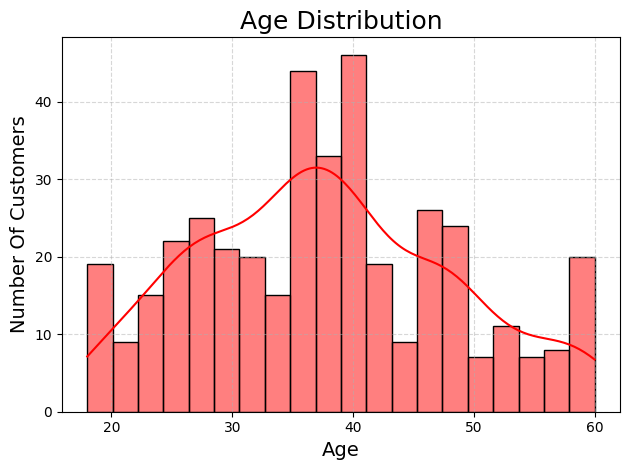

In [13]:
sns.histplot(dataset['Age'],color='red',edgecolor="black",bins=20,kde=True)
plt.title('Age Distribution',fontsize=18)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Number Of Customers',fontsize=14)
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

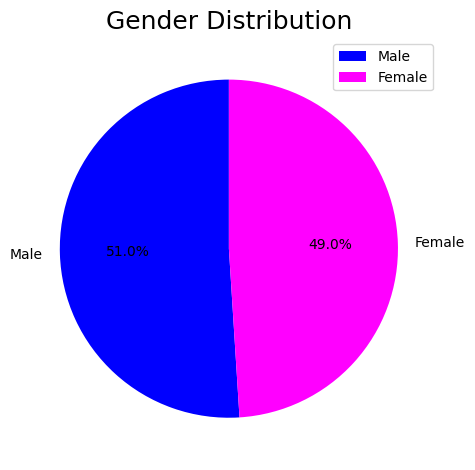

In [14]:
plt.pie(dataset['Gender'].value_counts().values,colors=['blue','magenta'],labels=['Male','Female'],autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution',fontsize=18)
plt.legend(labels=['Male','Female'])
plt.tight_layout()
plt.show()

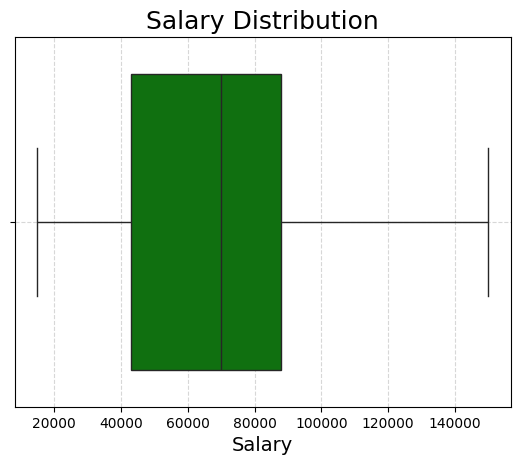

In [15]:
sns.boxplot(data=dataset,x='Salary',color='green',orient='h')
plt.title('Salary Distribution',fontsize=18)
plt.xlabel('Salary',fontsize=14)
plt.grid(True,linestyle='--',alpha=0.5)

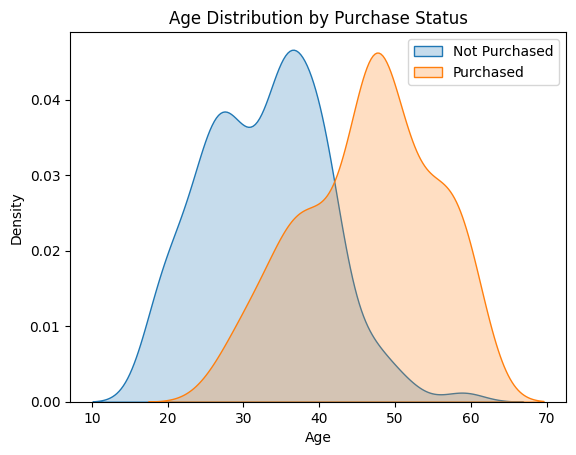

In [29]:
sns.kdeplot(data=dataset[dataset['Purchased'] == 0]['Age'], label='Not Purchased',fill=True)
sns.kdeplot(data=dataset[dataset['Purchased'] == 1]['Age'], label='Purchased',fill=True)
plt.title('Age Distribution by Purchase Status')
plt.xlabel('Age')
plt.legend()
plt.show()

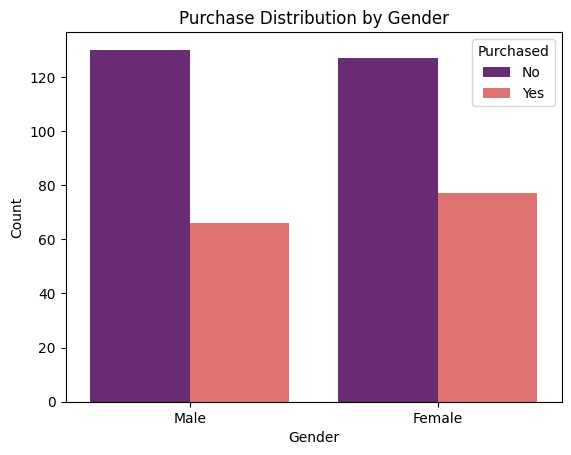

In [17]:
sns.countplot(x='Gender', data=dataset, palette='magma', hue='Purchased')
plt.title('Purchase Distribution by Gender',)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Purchased', labels=['No', 'Yes'])
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

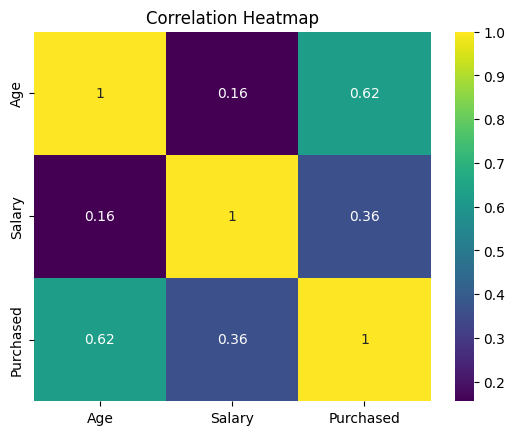

In [18]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')

# Data Preprocessing

In [19]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X,y

(     Gender  Age  Salary
 0      Male   19   19000
 1      Male   35   20000
 2    Female   26   43000
 3    Female   27   57000
 4      Male   19   76000
 ..      ...  ...     ...
 395  Female   46   41000
 396    Male   51   23000
 397  Female   50   20000
 398    Male   36   33000
 399  Female   49   36000
 
 [400 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

Splitting Data into Training and Testing Sets

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Encoding Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
X_train['Gender'] = l.fit_transform(X_train['Gender'])
X_test['Gender'] = l.transform(X_test['Gender'])

Scaling The Numerical Data


In [22]:
from sklearn.preprocessing import StandardScaler
s_age=StandardScaler()
s_sal=StandardScaler()
X_train['Age']=s_age.fit_transform(X_train[['Age']])
X_train['Salary']=s_sal.fit_transform(X_train[['Salary']])
X_test['Age']=s_age.transform(X_test[['Age']])
X_test['Salary']=s_sal.transform(X_test[['Salary']])

In [23]:
X_train,X_test

(     Gender       Age    Salary
 3         0 -1.066752 -0.386344
 18        1  0.797535 -1.229939
 202       0  0.110692  1.853544
 250       0  0.601294 -0.909955
 274       0  1.876859 -1.288118
 ..      ...       ...       ...
 71        0 -1.361114 -1.259028
 106       0 -1.164873 -1.026312
 270       0  0.503174  1.824455
 348       1  0.110692  0.195445
 102       0 -0.576151  0.457250
 
 [320 rows x 3 columns],
      Gender       Age    Salary
 209       0  0.797535 -1.404475
 280       0  2.073100  0.515429
 33        0 -0.968632 -0.764507
 210       0  0.993775  0.748145
 93        0 -0.870512 -1.229939
 ..      ...       ...       ...
 246       0 -0.281789 -0.589971
 227       1  1.778738  1.824455
 369       0  1.582498 -1.288118
 176       0 -0.281789 -0.677239
 289       0 -0.085549  0.224534
 
 [80 rows x 3 columns])

# Model Building

In [24]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=model.predict(X_test)

In [26]:
y_pred,np.array(y_test)

(array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]))

# Evaluating The Model

In [27]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
a

0.9375

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[50  2]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80

